### Convolutional Neural Networks (CNN)

A Convolutional Neural Network (CNN) is a specialized type of neural network architecture primarily designed for processing structured grid data such as images. CNNs leverage spatial relationships by using specialized layers that apply convolution operations to extract features from input data.

The process begins with the **input layer**, which receives raw data (typically images). This is followed by alternating **convolutional layers** and **pooling layers**. Convolutional layers apply learnable **filters** (or kernels) that slide across the input data, performing element-wise multiplications and summations to create **feature maps** that highlight patterns like edges, textures, and shapes. Pooling layers (often **max pooling**) reduce spatial dimensions while preserving important features. After several conv-pool layer combinations, the network typically includes **fully connected layers** similar to traditional ANNs. The final layer produces outputs appropriate for the task, such as class probabilities for image classification.

The network learns through **backpropagation**, but with specialized gradient calculations for convolutional operations. During training, the network learns optimal filter values to extract increasingly complex features - from simple edges in early layers to complex object parts in deeper layers. This hierarchical feature extraction capability makes CNNs exceptionally effective for computer vision tasks.

#### Pros
* Exceptional at processing spatial data like images and videos
* Automatic feature extraction reduces the need for manual feature engineering
* Parameter sharing and local connectivity provide computational efficiency
* Translation invariance - can recognize patterns regardless of position
* Built-in regularization through weight sharing reduces overfitting risk
* Highly effective for transfer learning using pre-trained models

#### Cons
* Can be computationally intensive, especially for large images or deep architectures
* Requires substantial training data for complex tasks
* Limited interpretability of learned features in deeper layers
* Less effective for non-grid data without special adaptations
* May struggle with rotation or scale variations without data augmentation
* Often requires careful architecture design and hyperparameter tuning

#### Key Components & Concepts

##### Core CNN Layers

Each layer type in a CNN serves a specific purpose in feature extraction and processing.

| Layer Type | Purpose | Parameters | Notes |
| :---------- | :---------- | :---------- | :---------- |
| **Convolutional** | Extract features using filters | Filters, stride, padding | Main feature extraction component |
| **Pooling** | Reduce spatial dimensions | Pool size, stride | Typically max or average pooling |
| **Batch Normalization** | Stabilize learning | Momentum, epsilon | Placed after convolutions |
| **Dropout** | Prevent overfitting | Dropout rate | Usually 0.2-0.5 |
| **Fully Connected** | Final classifications | Number of neurons | Used in final layers |

<br>

##### Convolutional Layer Parameters

The behavior of convolutional layers is controlled by several key parameters.

| Parameter | Description | Impact |
| :---------- | :---------- | :---------- |
| **Filter Size** | Dimensions of the convolution kernel | Larger filters capture more context but have more parameters |
| **Number of Filters** | How many different feature maps to create | More filters detect more features but increase computation |
| **Stride** | How many pixels to shift when sliding the filter | Larger strides reduce output dimensions |
| **Padding** | Adding pixels around input borders | "Same" padding preserves spatial dimensions |
| **Dilation** | Spacing between filter elements | Increases receptive field without increasing parameters |

<br>

##### Pooling Layer Types

Pooling layers reduce spatial dimensions while preserving important features.

| Type | Operation | Use Case | Formula/Description |
| :---------- | :---------- | :---------- | :---------- |
| **Max Pooling** | Takes maximum value in window | Most common, preserves strongest features | `max(values in window)` |
| **Average Pooling** | Takes average of values in window | Smooths features, useful for smaller feature maps | `mean(values in window)` |
| **Global Pooling** | Reduces entire feature map to single value | Used before fully connected layers | `max/mean(entire feature map)` |

<br>

##### Data Augmentation Techniques

Data augmentation artificially increases the training set by creating modified versions of images.

| Technique | Operation | Implementation | Benefits |
| :---------- | :---------- | :---------- | :---------- |
| **Flipping** | Mirror images horizontally/vertically | `ImageDataGenerator(horizontal_flip=True)` | Doubles dataset size |
| **Rotation** | Rotate by random angles | `ImageDataGenerator(rotation_range=20)` | Rotation invariance |
| **Scaling** | Zoom in/out randomly | `ImageDataGenerator(zoom_range=0.2)` | Scale invariance |
| **Shifting** | Move image contents | `ImageDataGenerator(width_shift_range=0.2)` | Position invariance |
| **Brightness/Contrast** | Alter lighting conditions | `ImageDataGenerator(brightness_range=[0.8,1.2])` | Lighting robustness |
| **Cutout/Random Erasing** | Blank out random regions | Custom implementation | Occlusion robustness |

<br>

##### CNN Configurations for Different Tasks

CNNs can be adapted for various computer vision tasks beyond classification.

| Task | Output Layer | Loss Function | Architecture Adaptation |
| :---------- | :---------- | :---------- | :---------- |
| **Image Classification** | Softmax | Categorical Cross-Entropy | Standard CNN |
| **Object Detection** | Multiple outputs | Combined (localization + classification) | R-CNN, YOLO, SSD |
| **Semantic Segmentation** | Pixel-wise softmax | Pixel-wise cross-entropy | U-Net, FCN |
| **Image Generation** | Tanh/Sigmoid | Various (adversarial, perceptual) | GANs, VAEs |
| **Super-Resolution** | Linear | MSE, perceptual loss | SRCNN, ESRGAN |

<br>

##### Tips and Tricks for Training CNNs

| Trick | Why It Helps | Implementation |
| :---------- | :---------- | :---------- |
| **Start with proven architectures** | Leverage established designs | Use pre-trained models or known architectures |
| **Use transfer learning** | Utilize pre-learned features | Freeze early layers, fine-tune later ones |
| **Gradually increase complexity** | Build understanding of model behavior | Start shallow and add depth as needed |
| **Monitor intermediate activations** | Debug feature learning | Plot feature maps during training |
| **Use learning rate schedules** | Optimize convergence | Reduce learning rate when plateauing |
| **Use weight decay** | Prevent overfitting | Add L2 regularization to optimizer |
| **Implement early stopping** | Prevent overfitting | Stop when validation metrics plateau |
| **Use batch normalization** | Stabilize training | Add after convolutional layers |

<br>

#### General Workflow for Building a CNN

1. **Preprocess data:**
   * Resize images to consistent dimensions.
   * Normalize pixel values (typically to [0,1] or [-1,1]).
   * Create training, validation, and test sets.
   * Set up data augmentation pipeline.

2. **Choose architecture:**
   * For new problems, consider starting with a proven architecture.
   * For transfer learning, select an appropriate pre-trained model.
   * Customize final layers based on your specific task.

3. **Build CNN Architecture:**
   * Input Layer: Define shape based on image dimensions.
   * Feature Extraction Blocks:
     * Convolutional layers (start with small filters, e.g., 3x3)
     * Activation functions (typically ReLU)
     * Batch normalization (after convolutions)
     * Pooling layers (typically max pooling)
   * Classification Head:
     * Global pooling or flattening
     * Dense layers with dropout
     * Output layer with appropriate activation (e.g., softmax for classification)

4. **Compile the Model:**
   * Choose optimizer: Adam is often effective, but SGD with momentum can work better for some tasks.
   * Set loss function based on task (e.g., categorical_crossentropy for classification).
   * Select appropriate metrics (e.g., accuracy, precision, recall).

5. **Fit Model (Train):**
   * Set appropriate batch size (typically 32-128 depending on memory constraints).
   * Choose number of epochs and learning rate.
   * Implement callbacks:
     * Learning rate scheduling
     * Early stopping
     * Model checkpointing

6. **Evaluate Model:**
   * Assess performance on validation set during training.
   * Final evaluation on the separate test set.
   * Analyze common misclassifications.

7. **Tune Model (Iterate):**
   * Adjust architecture depth/width.
   * Modify learning rate and optimization parameters.
   * Refine data augmentation strategy.
   * Consider ensemble methods for final improvements.

8. **Deploy Model:**
   * Export trained model in appropriate format.
   * Consider model optimization (quantization, pruning) for deployment.
   * Implement inference pipeline with appropriate pre/post-processing.

In [30]:
%pip install --quiet tensorflow pandas scikit-learn matplotlib

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape images to add channel dimension (MNIST is grayscale, so 1 channel)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [32]:
model = models.Sequential([
    #  First Convolutional Block: Extracts basic features like edges and textures
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), ## First convolution layer with 32 filters, input shape is 28x28 grayscale
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block: Extracts more complex features
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

     # Fully Connected Layers: Perform classification based on extracted features
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=3,            
    restore_best_weights=True 
)

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.7447 - loss: 0.7608 - val_accuracy: 0.9834 - val_loss: 0.0575
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9675 - loss: 0.1075 - val_accuracy: 0.9851 - val_loss: 0.0479
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9781 - loss: 0.0760 - val_accuracy: 0.9884 - val_loss: 0.0413
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.9898 - val_loss: 0.0372
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9844 - loss: 0.0497 - val_accuracy: 0.9909 - val_loss: 0.0329
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9925 - val_loss: 0.0268
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9933 - val_loss: 0.0262
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9893 - loss: 0.0337 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


<Figure size 1000x800 with 0 Axes>

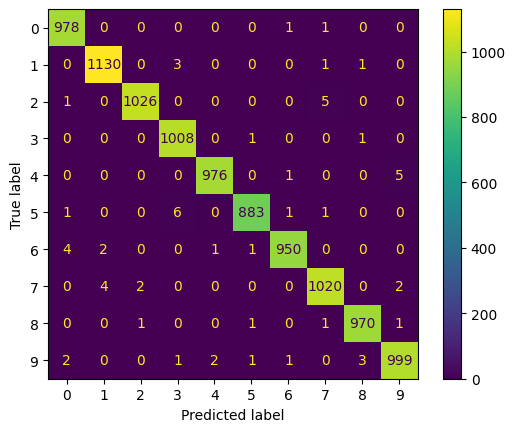

In [33]:
predictions = model.predict(test_images)
predictions_classes = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predictions_classes)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()